In [54]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Murthy ESSR\OneDrive\Desktop\credit card fraud\creditcard.csv')

In [55]:
print("Number of rows and columns:", df.shape)
print("Column names:", df.columns)
print("Data types of columns:", df.dtypes)
print("First 5 rows of the dataset:\n", df.head())
print(df.Time)
print(df.Amount)

Number of rows and columns: (284807, 31)
Column names: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data types of columns: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
First 5 rows of the dataset:
    Time        V1        V2        V3        V4        

In [56]:
print("missing values in each column:\n",df.isnull().sum())

missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [57]:
# class column represents whether the transaction is fradulent-1 or non-fradulent-0
class_count=df['Class'].value_counts()
print("class distribution :\n",class_count)
#1-fraud 0 otherwise

class distribution :
 0    284315
1       492
Name: Class, dtype: int64


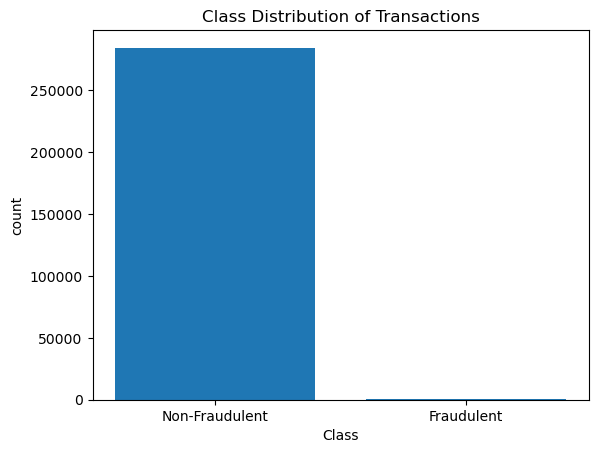

In [58]:
import matplotlib.pyplot as plt
plt.bar(class_count.index,class_count.values)
plt.xlabel("Class")
plt.ylabel("count")
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.title('Class Distribution of Transactions')
plt.show()

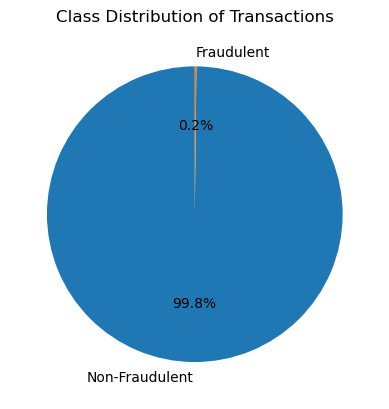

In [59]:
colors = ['#1f77b4', '#ff7f0e']
plt.pie(class_count, labels=['Non-Fraudulent', 'Fraudulent'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Transactions')
plt.show()


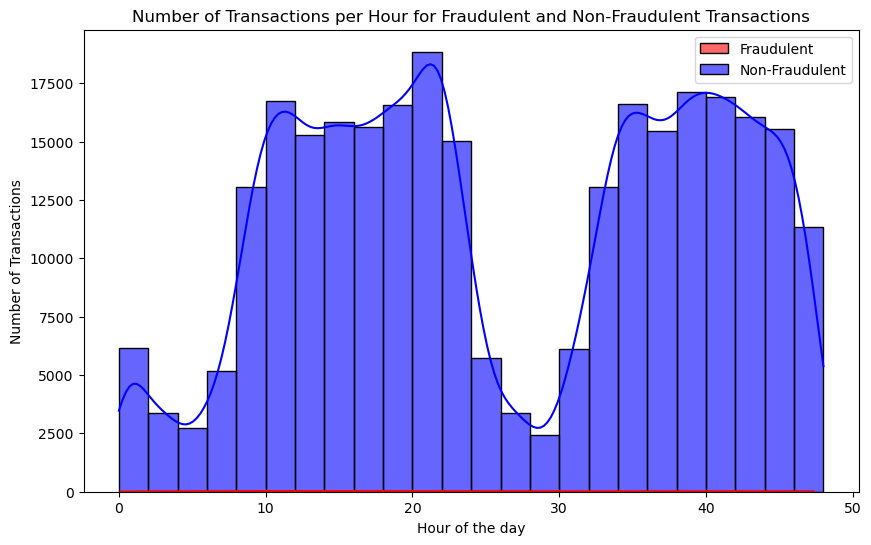

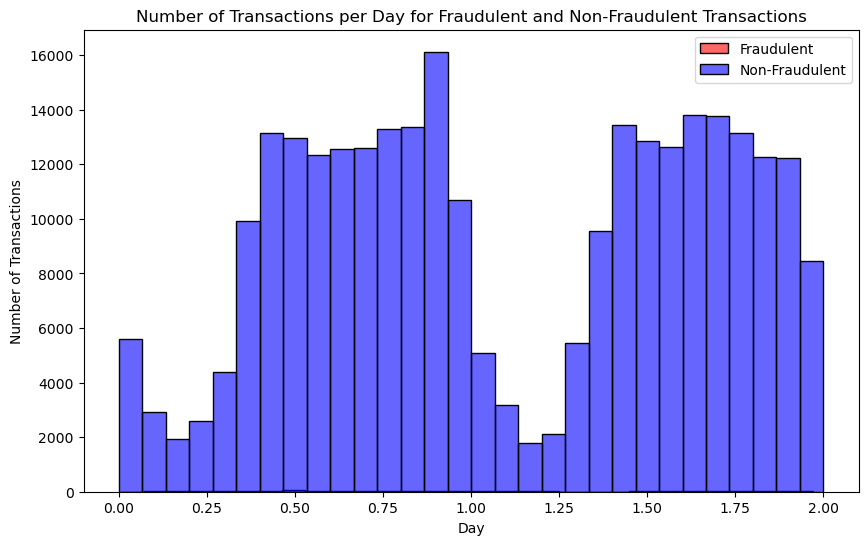

In [60]:
# Plot the number of transactions per hour for both classes
df['Time_hours'] = df['Time'] / 3600
df['Time_days'] = df['Time'] / (3600 * 24)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Time_hours'], bins=24, color='red', alpha=0.6, label='Fraudulent', kde=True)
sns.histplot(df[df['Class'] == 0]['Time_hours'], bins=24, color='blue', alpha=0.6, label='Non-Fraudulent', kde=True)
plt.xlabel('Hour of the day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Number of Transactions per Hour for Fraudulent and Non-Fraudulent Transactions')
plt.show()

# Plot the number of transactions per day for both classes
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Time_days'], bins=30, color='red', alpha=0.6, label='Fraudulent')
sns.histplot(df[df['Class'] == 0]['Time_days'], bins=30, color='blue', alpha=0.6, label='Non-Fraudulent')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Number of Transactions per Day for Fraudulent and Non-Fraudulent Transactions')
plt.show()


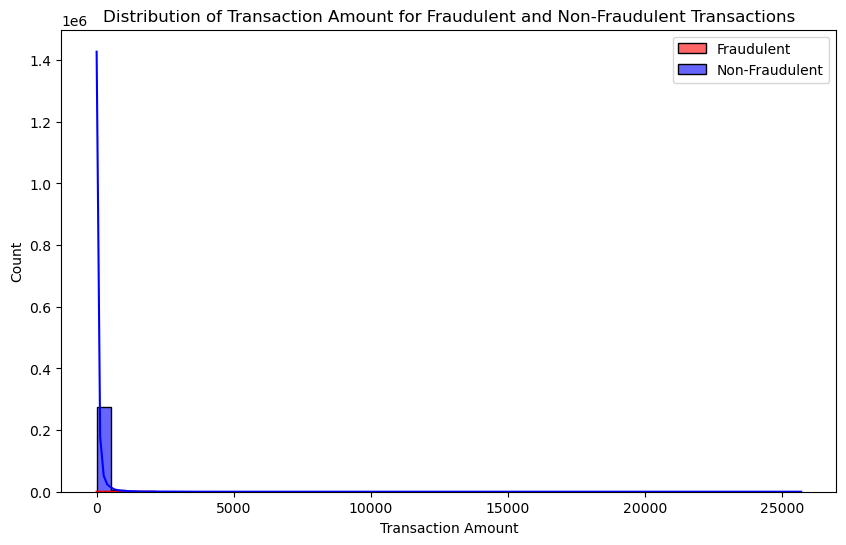

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the data into two DataFrames based on the target class
fraudulent_data = df[df['Class'] == 1]
non_fraudulent_data = df[df['Class'] == 0]

# Plot histograms to compare the distribution of transaction amount between the two classes
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_data['Amount'], bins=50, color='red', alpha=0.6, label='Fraudulent',kde=True)
sns.histplot(non_fraudulent_data['Amount'], bins=50, color='blue', alpha=0.6, label='Non-Fraudulent',kde =True)
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Transaction Amount for Fraudulent and Non-Fraudulent Transactions')
plt.show()


In [62]:
fraudulent_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [63]:
non_fraudulent_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [64]:
 df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_hours,Time_days
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,26.343945,1.097664
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,22.429669,0.934570


In [65]:
legit=non_fraudulent_data.sample(n=492)
n_df=pd.concat([legit,fraudulent_data],axis=0)
n_df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hours,Time_days
40900,40450.0,1.286847,0.239096,-0.125050,0.334966,0.155391,-0.157030,-0.072058,0.038862,-0.079991,...,-0.007564,-0.776937,0.309770,0.143932,-0.031547,0.008930,1.98,0,11.236111,0.468171
279407,168848.0,-0.958226,1.645114,-0.736560,-0.158214,0.262441,-1.228529,0.570299,0.075762,0.354243,...,0.184605,-0.030654,-0.943854,-0.482310,0.147058,0.362099,4.81,0,46.902222,1.954259
173357,121452.0,-0.848401,0.842568,1.201566,-0.590855,-0.000342,0.033381,0.108092,0.563143,-0.152477,...,0.053873,0.587008,-0.350586,-0.028541,-0.031616,0.066601,23.32,0,33.736667,1.405694
61702,49945.0,-1.718379,-1.468903,2.792018,1.664817,-0.008568,0.567531,-0.316749,0.363396,0.617865,...,0.337060,-0.033833,0.374110,-0.177342,-0.133376,-0.104445,218.02,0,13.873611,0.578067
181675,125076.0,-0.863600,0.986259,-0.163183,0.954832,0.900028,-0.525986,0.636358,0.367144,-0.717131,...,-0.034776,0.636037,-0.112245,-0.622353,0.304701,0.112564,26.00,0,34.743333,1.447639


In [66]:
n_df['Class'].value_counts()


0    492
1    492
Name: Class, dtype: int64

In [67]:
n_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_hours,Time_days
Class,,,,,,,,,,,,,,,,,,,,,
0,91993.085366,0.140308,0.059093,0.047973,0.028464,-0.100720,-0.002038,0.023308,-0.061097,0.039288,...,0.037716,-0.020955,0.024924,0.001067,-0.016956,0.007412,-0.011272,88.453801,25.553635,1.064735
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,22.429669,0.934570


In [68]:
# Verify column names in the DataFrame
print(n_df.columns)

# Drop 'Class' and 'Time' columns from n_df and create the feature set X
#X = n_df.drop(['Class', 'Time'], axis=1)  # Features

# Verify the remaining columns in X after dropping 'Class' and 'Time'
#print(X.columns)

# Proceed with the rest of your code
# ...


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_hours', 'Time_days'],
      dtype='object')


In [69]:
# Assuming you want to drop columns 'Column1', 'Column2', and 'Column3'
#columns_to_drop = ['Class', 'Time']
#X=n_df
#X=X.drop(columns_to_drop, axis=1, inplace=True)

X= n_df.drop(['Class','Time'], axis=1)  # Features
y = n_df['Class']  # Target variable (fraud or non-fraud)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X.shape[1]
print(X.columns)



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_hours',
       'Time_days'],
      dtype='object')


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))



Accuracy: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        99
           1       1.00      0.88      0.93        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



In [71]:
X.shape[1]


31

In [73]:
import joblib

# Assuming you have already trained your model and named it 'rf_classifier'
joblib.dump(rf_classifier, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [75]:
# Assuming you have already trained your model and named it 'rf_classifier'
joblib.dump(rf_classifier, 'random_forest_model.joblib')
import joblib
import numpy as np

# Load the saved Random Forest model
model = joblib.load('random_forest_model.joblib')

# Function to preprocess user input and make predictions
def predict_fraud(input_data):
    # Preprocess the input data as needed (e.g., scaling, feature engineering)
    # For simplicity, let's assume the input data is in the same format as the training data
    input_data = np.array(input_data).reshape(1, -1)

    # Make predictions using the loaded model
    prediction = model.predict(input_data)

    # Return the prediction (1 for fraud, 0 for non-fraud)
    return prediction[0]

# Take input from the user for V1 to V28 parameters
v_parameters = []
for i in range(1,29 ):
    v_value = float(input(f"Enter value for V{i}: "))
    v_parameters.append(v_value)

# Take input for the timestamp and amount
timestamp = float(input("Enter timestamp: "))
amount = float(input("Enter transaction amount: "))

# Calculate the 'Time_hours' and 'Time_days' features based on the provided timestamp
time_hours = timestamp / 3600
time_days = timestamp / (3600 * 24)

# Create the input_data list with user-provided values
input_data = v_parameters + [amount, time_hours, time_days]

# Make predictions using the provided input_data
prediction = predict_fraud(input_data)

# Print the result
if prediction == 1:
    print("The transaction is FRAUDULENT.")
else:
    print("The transaction is NOT FRAUDULENT.")

    

Enter value for V1: 1
Enter value for V2: 1
Enter value for V3: 1
Enter value for V4: 1
Enter value for V5: 1
Enter value for V6: 1
Enter value for V7: 1
Enter value for V8: 1
Enter value for V9: 1
Enter value for V10: 1
Enter value for V11: 1
Enter value for V12: 1
Enter value for V13: 1
Enter value for V14: 1
Enter value for V15: 1
Enter value for V16: 1
Enter value for V17: 1
Enter value for V18: 1
Enter value for V19: 1
Enter value for V20: 1
Enter value for V21: 1
Enter value for V22: 1
Enter value for V23: 1
Enter value for V24: 1
Enter value for V25: 1
Enter value for V26: 1
Enter value for V27: 1
Enter value for V28: 1
Enter timestamp: 15
Enter transaction amount: 20000
The transaction is NOT FRAUDULENT.
